In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras import applications
from keras.layers import AveragePooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger, TensorBoard, LambdaCallback
from keras.applications.resnet50 import ResNet50, preprocess_input 
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras import backend as K
import numpy as np
import pandas as pd
from keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
import random
import cv2
from PIL import Image
import os
from keras.utils import to_categorical
from collections import defaultdict
import jpeg4py as jpeg
from io import BytesIO

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os



In [3]:
from PIL import Image

In [4]:
for i in os.listdir('validation_full_size/Motorola-Droid-Maxx/'):
    if(i.split('.')[-1]!='jpg'):
        j_new = i.split('.')[:-2][0]+i.split('.')[-1]+'.jpg'
        os.rename('validation_full_size/Motorola-Droid-Maxx/'+i,'validation_full_size/Motorola-Droid-Maxx/'+j_new)

In [4]:
for i in os.listdir('validation_full_size/'):
    for j in os.listdir('validation_full_size/' + i):
        if(j.split('.')[-1]!='jpg'):
            j_new = j.split('.')[:-1][0]+'.jpg'
            print(j_new)
            print(j)
            #os.rename('validation_full_size/' + i+'/'+j,'validation_full_size/' + i+'/'+j_new)

img_0e9c690_manip.jpg
img_0e9c690_manip.tif
img_9ab4248_manip.jpg
img_9ab4248_manip.tif
img_7968151_manip.jpg
img_7968151_manip.tif
img_23387c1_unalt.jpg
img_23387c1_unalt.tif
img_4bca669_unalt.jpg
img_4bca669_unalt.tif
img_7fe597b_unalt.jpg
img_7fe597b_unalt.tif
img_a51c95c_manip.jpg
img_a51c95c_manip.tif
img_43e6619_unalt.jpg
img_43e6619_unalt.tif
img_ea59c15_manip.jpg
img_ea59c15_manip.tif
img_b38df95_unalt.jpg
img_b38df95_unalt.tif
img_c14aaae_manip.jpg
img_c14aaae_manip.tif
img_79e215d_manip.jpg
img_79e215d_manip.tif
img_e1b9edd_unalt.jpg
img_e1b9edd_unalt.tif
img_522eb32_manip.jpg
img_522eb32_manip.tif
img_a8a6cf8_unalt.jpg
img_a8a6cf8_unalt.tif
img_e847214_unalt.jpg
img_e847214_unalt.tif
img_deb8d2e_unalt.jpg
img_deb8d2e_unalt.tif
img_701167b_manip.jpg
img_701167b_manip.tif
img_d68f1e8_unalt.jpg
img_d68f1e8_unalt.tif
img_f7d4304_unalt.jpg
img_f7d4304_unalt.tif
img_74defa7_unalt.jpg
img_74defa7_unalt.tif
img_ae838ef_unalt.jpg
img_ae838ef_unalt.tif
img_592f4e4_unalt.jpg
img_592f4e

img_35c4fec_unalt.jpg
img_35c4fec_unalt.tif
img_553cee6_manip.jpg
img_553cee6_manip.tif
img_20cf919_manip.jpg
img_20cf919_manip.tif
img_225ac71_unalt.jpg
img_225ac71_unalt.tif
img_953b8fd_manip.jpg
img_953b8fd_manip.tif
img_0f43170_unalt.jpg
img_0f43170_unalt.tif
img_6df37f2_unalt.jpg
img_6df37f2_unalt.tif
img_1eb9d8f_manip.jpg
img_1eb9d8f_manip.tif
img_1b81e76_manip.jpg
img_1b81e76_manip.tif
img_5366cee_manip.jpg
img_5366cee_manip.tif
img_af6b08d_manip.jpg
img_af6b08d_manip.tif
img_b0b0d7e_manip.jpg
img_b0b0d7e_manip.tif
img_b5bf89a_unalt.jpg
img_b5bf89a_unalt.tif
img_f9c035d_manip.jpg
img_f9c035d_manip.tif
img_110ff97_unalt.jpg
img_110ff97_unalt.tif
img_eac0494_unalt.jpg
img_eac0494_unalt.tif
img_0ecc615_manip.jpg
img_0ecc615_manip.tif
img_3b45a7c_unalt.jpg
img_3b45a7c_unalt.tif
img_5b5bb54_manip.jpg
img_5b5bb54_manip.tif
img_f310d4d_manip.jpg
img_f310d4d_manip.tif
img_9754202_manip.jpg
img_9754202_manip.tif
img_995c731_unalt.jpg
img_995c731_unalt.tif
img_051f3b7_unalt.jpg
img_051f3b

img_cb3f566_unalt.tif
img_b25b81e_unalt.jpg
img_b25b81e_unalt.tif
img_7436197_unalt.jpg
img_7436197_unalt.tif
img_8af5c06_manip.jpg
img_8af5c06_manip.tif
img_4738d8f_manip.jpg
img_4738d8f_manip.tif
img_a1e746f_manip.jpg
img_a1e746f_manip.tif
img_35545c4_manip.jpg
img_35545c4_manip.tif
img_9e0c8cb_manip.jpg
img_9e0c8cb_manip.tif
img_1e3967e_unalt.jpg
img_1e3967e_unalt.tif
img_2afa619_unalt.jpg
img_2afa619_unalt.tif
img_e0d482e_manip.jpg
img_e0d482e_manip.tif
img_00d0e3b_unalt.jpg
img_00d0e3b_unalt.tif
img_dd755d6_unalt.jpg
img_dd755d6_unalt.tif
img_ff225ec_manip.jpg
img_ff225ec_manip.tif
img_9afad85_unalt.jpg
img_9afad85_unalt.tif
img_9dcec92_manip.jpg
img_9dcec92_manip.tif
img_75ba5e6_manip.jpg
img_75ba5e6_manip.tif
img_8d0d869_manip.jpg
img_8d0d869_manip.tif
img_cfe17e9_manip.jpg
img_cfe17e9_manip.tif
img_6f905c1_manip.jpg
img_6f905c1_manip.tif
img_750741d_manip.jpg
img_750741d_manip.tif
img_91d52c6_manip.jpg
img_91d52c6_manip.tif
img_a6b3818_unalt.jpg
img_a6b3818_unalt.tif
img_113723

In [5]:
img_size_list_h = []
img_size_list_w = []
for i in os.listdir('test_224/'):
    for j in os.listdir('test_224/' + i):
        im = Image.open('test_224/' + i + '/'+j)
        if(im.size[1]<125):
            print(j)
        img_size_list_h.append(im.size[0])
        img_size_list_w.append(im.size[1])
        

In [6]:
img_size_arr_h = np.array(img_size_list_h)
img_size_arr_w = np.array(img_size_list_w)

In [7]:
img_size_arr = np.sqrt(img_size_arr_h*img_size_arr_h)

In [8]:
plt.hist(img_size_arr_w)


(array([     0.,      0.,      0.,      0.,      0.,  13200.,      0.,
             0.,      0.,      0.]),
 array([ 223.5,  223.6,  223.7,  223.8,  223.9,  224. ,  224.1,  224.2,
         224.3,  224.4,  224.5]),
 <a list of 10 Patch objects>)

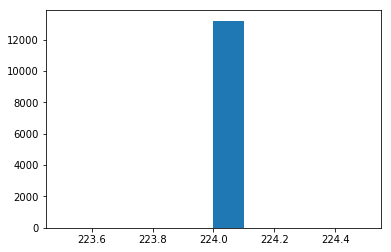

In [9]:
plt.show()

In [13]:
predictions = np.load('predictions.npy')

In [14]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 9, 9, 2, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [15]:
correct = np.load('correct_classes.npy')

In [16]:
correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

In [23]:
true_positive = np.zeros(10)
false_positive = np.zeros(10)
true_negative = np.zeros(10)
false_negative = np.zeros(10)
for i in range(len(predictions)):
    if(predictions[i]==correct[i]):
        true_positive[predictions[i]] = true_positive[predictions[i]] + 1
    else:
        false_positive[predictions[i]] = false_positive[predictions[i]] + 1
        false_negative[correct[i]] = false_negative[correct[i]] +1

In [24]:
print('true_positive')
print(true_positive)
print('false_positive')
print(false_positive)
print('false_negative')
print(false_negative)
print('Total')
print(true_positive+false_negative)


true_positive
[ 97.  98.  67.  68.  82.  73.  97.  80.  86.  89.]
false_positive
[ 6.  4.  3.  4.  1.  3.  4.  1.  4.  8.]
false_negative
[ 1.  1.  8.  9.  4.  3.  2.  6.  2.  2.]
Total
[ 98.  99.  75.  77.  86.  76.  99.  86.  88.  91.]


In [25]:
x = np.zeros((10,10))
for i in range(len(predictions)):
    x[predictions[i]][correct[i]] += 1

In [1]:
#confusion matrix

In [26]:
x

array([[ 97.,   0.,   5.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,  98.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,   0.],
       [  1.,   0.,  67.,   0.,   1.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,  68.,   0.,   0.,   1.,   1.,   0.,   1.],
       [  0.,   0.,   0.,   0.,  82.,   0.,   0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   1.,   1.,  73.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   1.,   0.,  97.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   0.,  80.,   0.,   0.],
       [  0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,  86.,   1.],
       [  0.,   0.,   2.,   5.,   0.,   0.,   0.,   1.,   0.,  89.]])

In [29]:
max = 0
for i in range(10):
    for j in range(10):
        if(x[i][j]+x[j][i] > max and i!=j):
            max = x[i][j]+x[j][i]
            print(i,j)

0 2


In [8]:
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = validation_datagen.flow_from_directory(
                        'validation',
                        target_size=(512,512),
                        batch_size=10,
                        class_mode='categorical',
                        shuffle=False)

Found 875 images belonging to 10 classes.


In [11]:
validation_generator.class_indices


{'HTC-1-M7': 0,
 'LG-Nexus-5x': 1,
 'Motorola-Droid-Maxx': 2,
 'Motorola-Nexus-6': 3,
 'Motorola-X': 4,
 'Samsung-Galaxy-Note3': 5,
 'Samsung-Galaxy-S4': 6,
 'Sony-NEX-7': 7,
 'iPhone-4s': 8,
 'iPhone-6': 9}

In [19]:
error_indexes = []
for i in range(len(predictions)):
    if(predictions[i]!=correct[i]):
        error_indexes.append(i)

In [20]:
error_index_iter = iter(error_indexes)

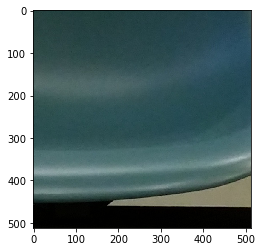

In [46]:
image = mpimg.imread('validation/'+ validation_generator.filenames[next(error_index_iter)])
plt.imshow(image)
plt.show()

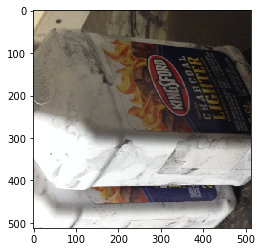

In [47]:
image = mpimg.imread('test/temp/'+ 'img_020ef15_manip.tif')
plt.imshow(image)
plt.show()